# cs5830 - Group 15 - Project 1

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Analysis 1 - Average Salary per Team

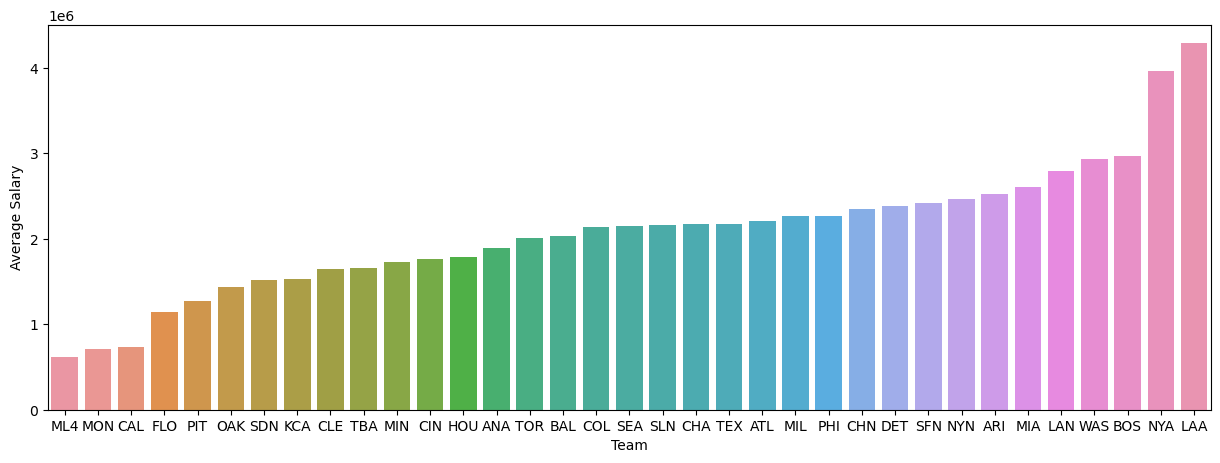

In [2]:
salaries = pd.read_csv("baseballdatabank-2022.2/contrib/Salaries.csv")
avg_salaries = salaries.groupby('teamID').agg({'salary':'mean'}).reset_index().sort_values('salary')
 
# creating the bar plot
plt.figure(num=1, figsize=(15,5))
ax = sns.barplot(data=avg_salaries, x='teamID', y='salary')
ax.set_xlabel('Team')
ax.set_ylabel('Average Salary')
plt.savefig('./graphs/AverageSalary.png')

## Analysis 2 - Stolen Bases vs Caught Stealing

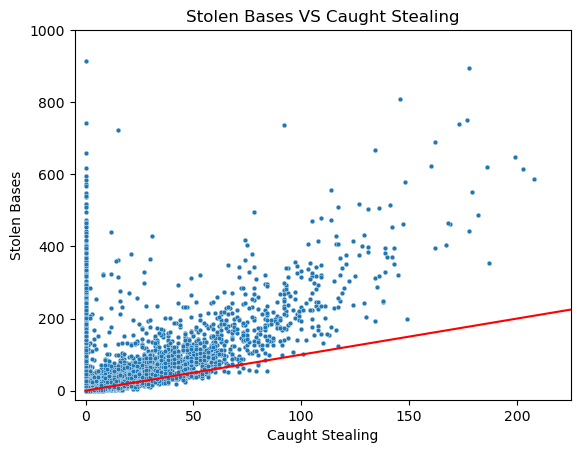

In [3]:
batting = pd.read_csv("baseballdatabank-2022.2/core/Batting.csv")
SB_and_CS = batting.groupby('playerID').agg({'SB':'sum', 'CS':'sum'})

plt.figure(num=2)
ax = sns.scatterplot(data=SB_and_CS, x='CS', y='SB', s=12)
x = np.linspace(0, 400, 10)
ax.plot(x, x, '-r')
ax.set_ylabel("Stolen Bases")
ax.set_xlabel("Caught Stealing")
ax.set_title("Stolen Bases VS Caught Stealing")
plt.xlim(-5, 225)
plt.ylim(-25, 1000)
plt.savefig("./graphs/StolenBasesVSCaughtStealing.png")

## Analysis 3 - Percentage of All Star Players From Each Team in 20 year intervals

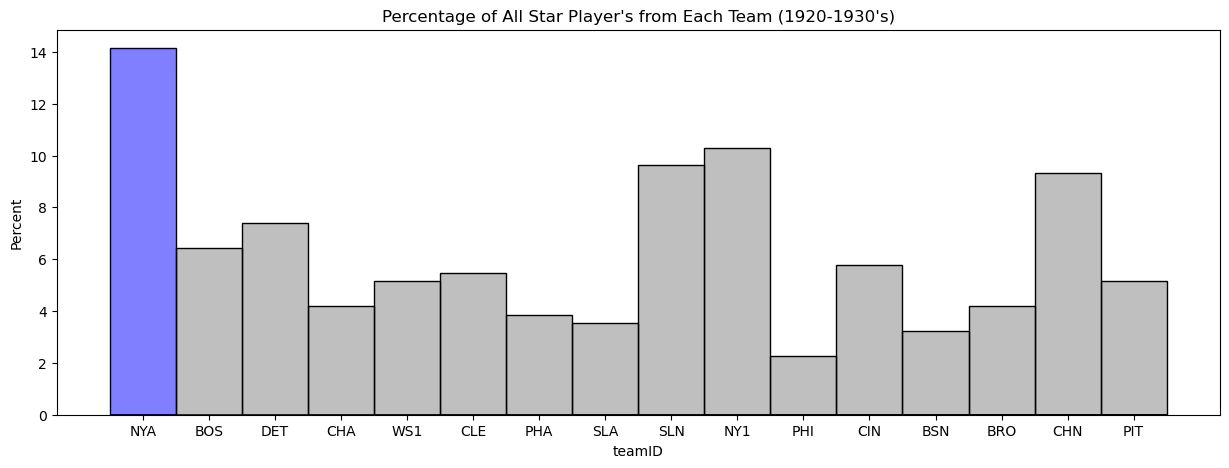

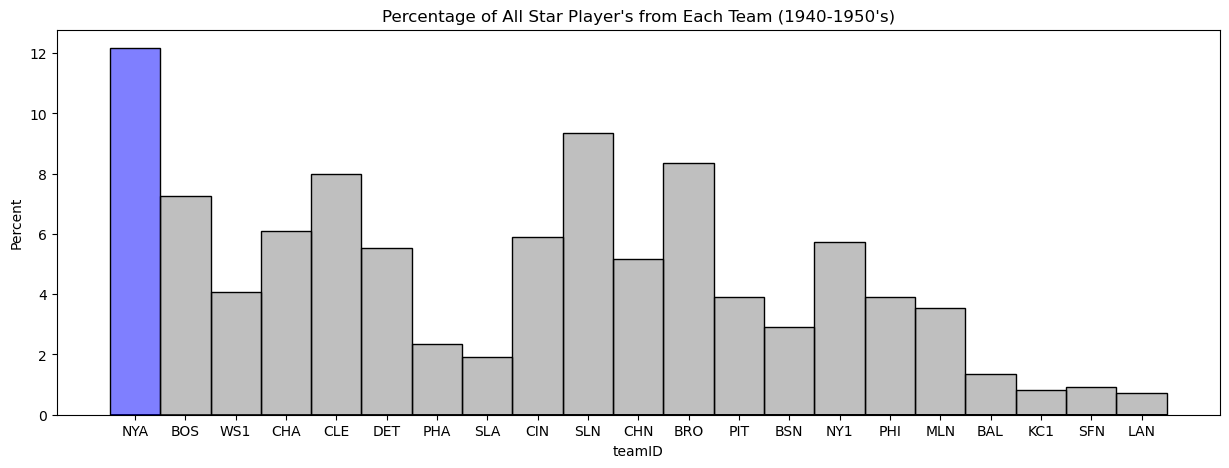

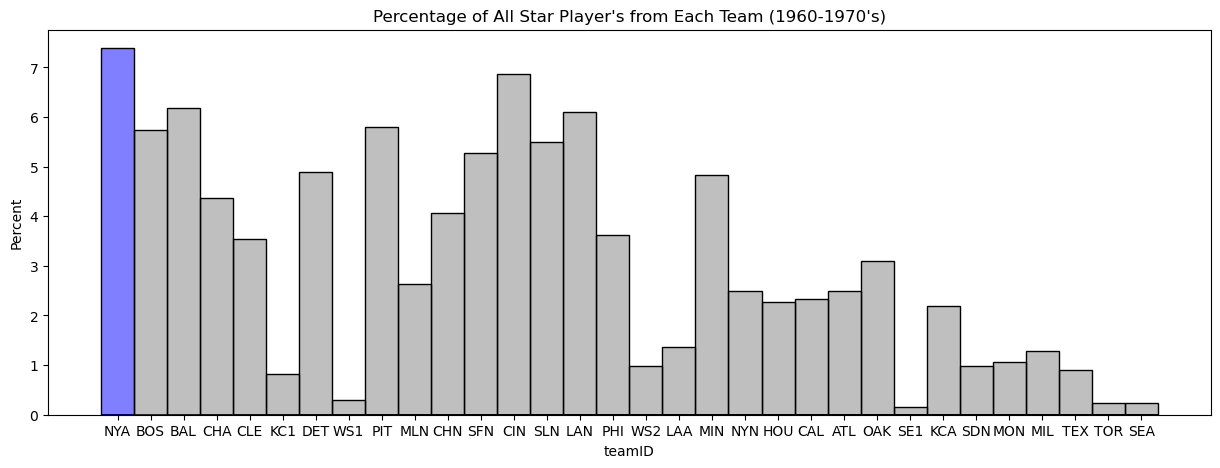

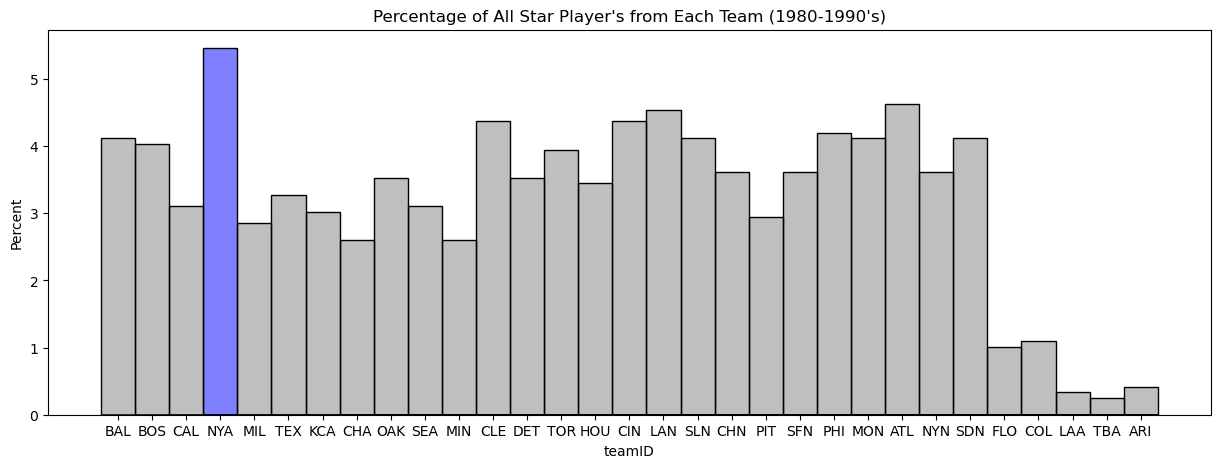

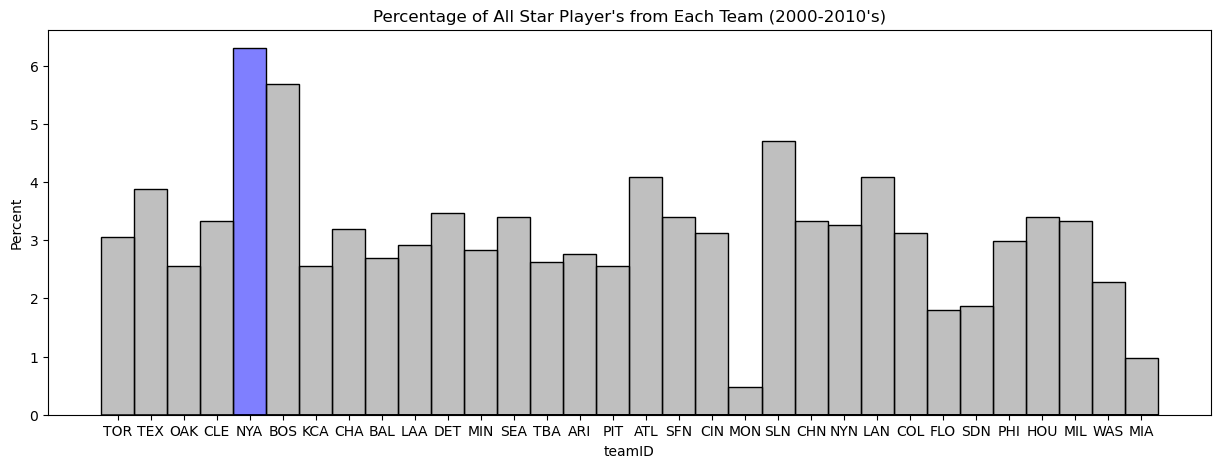

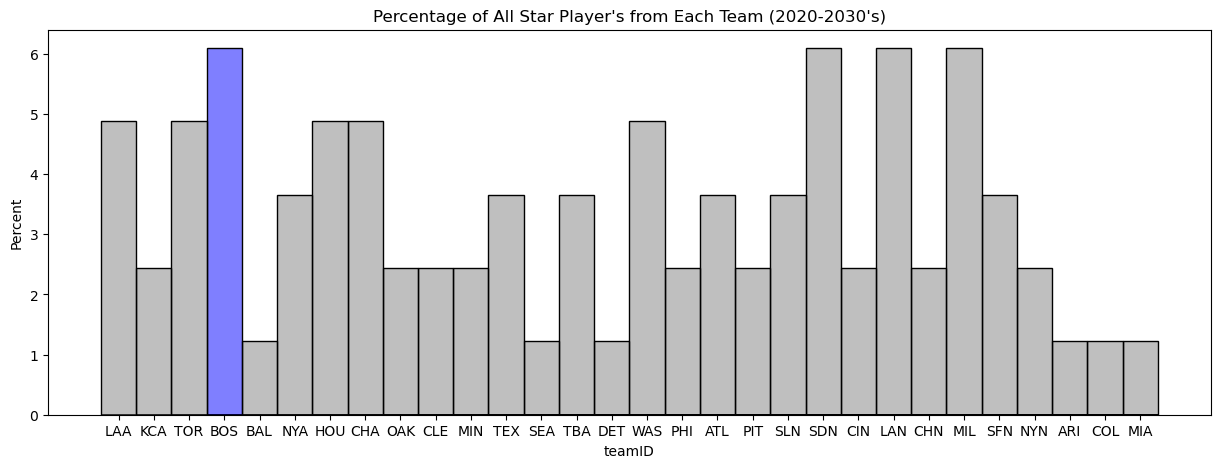

In [4]:
# split into 20 year intervals
df = pd.read_csv("./baseballdatabank-2022.2/core/AllStarFull.csv")
df['decade'] = (20 * (df['yearID'] // 20)).astype(str)

def set_custom_palette(series, max_color = 'blue', other_color = 'grey'):
    max_val = series.mode()[0];
    pal = []
    
    for item in series.unique():
        if item == max_val:
            pal.append(max_color)
        else:
            pal.append(other_color)
    return pal

for decade in df['decade'].unique():
    group = df[df.decade == decade]
    plt.figure(num=decade, figsize=(15,5))
    palette=set_custom_palette(group['teamID'])
    ax = sns.histplot(data=group, x='teamID', stat='percent', hue='teamID', palette=palette)
    ax.set_title(f"Percentage of All Star Player's from Each Team ({decade}-{int(decade)+10}'s)")
    ax.legend_.remove()
    plt.savefig(f'./graphs/AllStarPercentage-{decade}.png')
    

## Analysis 4 - Number of Players Who Retired Each Year

<Figure size 640x480 with 0 Axes>

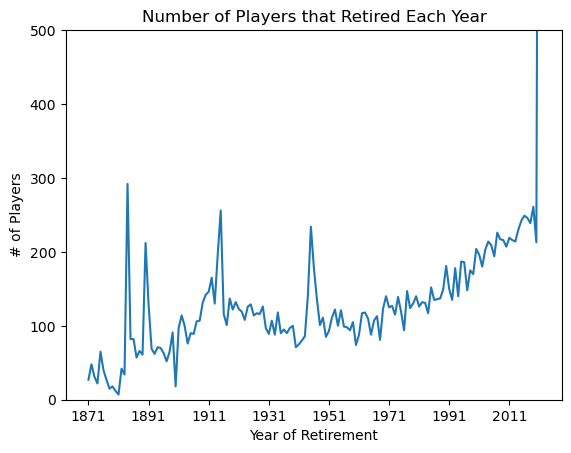

In [5]:
# finalGame (first four digits) year for each player
players = pd.read_csv("./baseballdatabank-2022.2/core/People.csv")
players['finalYear'] = players['finalGame'].str[:4]

plt.figure()
yearlyRetirees = players.groupby('finalYear').agg({'playerID': 'count'})
retired_graph = yearlyRetirees.plot.line()
retired_graph.set_xlabel('Year of Retirement')
retired_graph.set_ylabel('# of Players')
retired_graph.set_title('Number of Players that Retired Each Year')
retired_graph.legend_.remove()
retired_graph.set_ylim(0, 500)
plt.savefig('YearRetired.png')